In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from IPython.display import Image
import sklearn

 
     1.Administrative : Administrative Value

     2.Administrative_Duration : Duration in Administrative Page

     3.Informational : Informational Value

     4.Informational_Duration : Duration in Informational Page

     5.ProductRelated : Product Related Value

     6.ProductRelated_Duration : Duration in Product Related Page

     7.BounceRates : Bounce Rates of a web page
     i.e is feature for a web page refers to the percentage of visitors who enter the site from that page
     and then leave ("bounce") without triggering any other requests to the analytics server during that session

     8.ExitRates : Exit rate of a web page
     i.e is for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
     9.PageValues : Page values of each web page
    i.e is average value for a web page that a user visited before completing an e-commerce transaction
    
    
     how it calculated 
     Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce      transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your          site's revenue. If the page wasn't involved in an ecommerce transaction for your website in any way, then the Page Value for that page will be 0 since the page was never visited in a session where a transaction occurred.
        
        Ecommerce Revenue + Total Goal Value
        Number of Unique Pageviews for Given Page
        
        
        
    10.SpecialDay : Special days like valentine etc
    visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely 
    to be finalized with transaction.

    11.Month : Month of the year

    12.OperatingSystems : Operating system used
    13.Browser : Browser used
    14.Region : Region of the user
    15.TrafficType : Traffic Type
    16.VisitorType : Types of Visitor
    17.Weekend : Weekend or not
    18.Revenue : Revenue will be generated or not

In [3]:
data=pd.read_csv('online_shoppers_intention.csv')

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.shape  ### cheack the shape of the data 

(12330, 18)

In [6]:
total=data.isnull().sum()
percent=(data.isnull().sum()/data.isnull().count()*100)
percent      ### checking the percent of the data is misssing 

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

In [7]:
data['SpecialDay'] = data['SpecialDay'].astype('object')
data['OperatingSystems'] = data['OperatingSystems'].astype('object')
data['Browser'] = data['Browser'].astype('object')
data['Region'] = data['Region'].astype('object')
data['TrafficType'] = data['TrafficType'].astype('object')


In [8]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [9]:
data_num_cols = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
data_cat_cols = data[['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']]

In [10]:
data_num_cols.head() ### numerical columns of the data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0


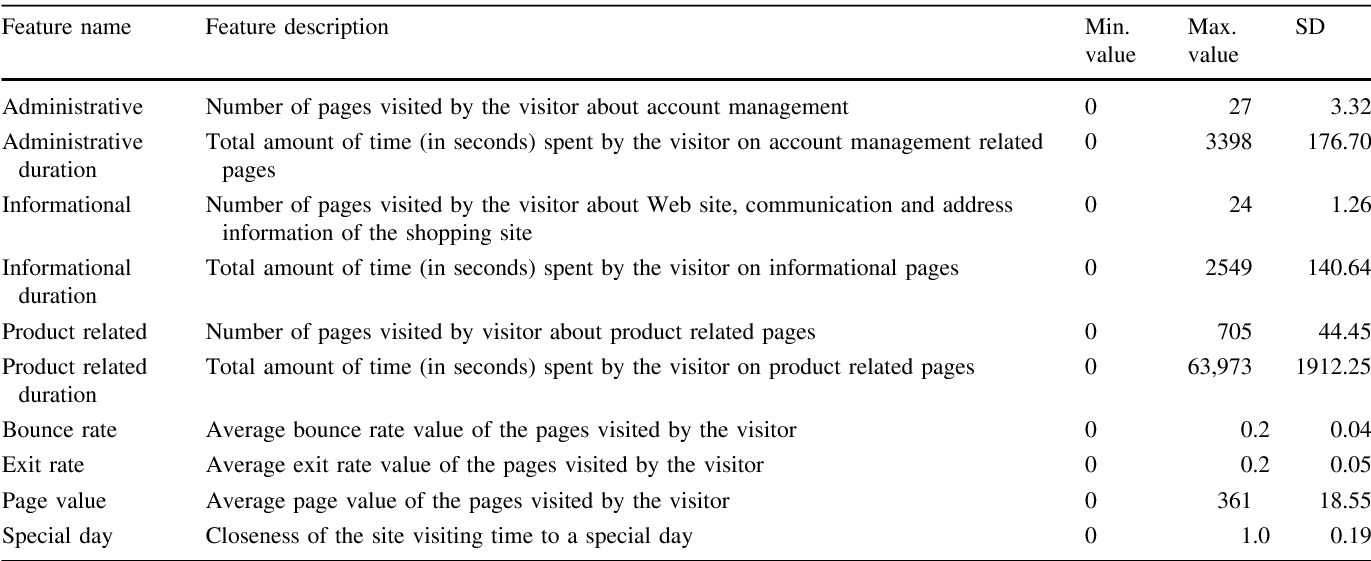

In [11]:

Image(filename='attributes.png')  ### numerical columns

In [12]:
data_num_cols.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


In [13]:
data_cat_cols.head() ### categorical columns of the data 

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,Feb,1,1,1,1,Returning_Visitor,False,False
1,Feb,2,2,1,2,Returning_Visitor,False,False
2,Feb,4,1,9,3,Returning_Visitor,False,False
3,Feb,3,2,2,4,Returning_Visitor,False,False
4,Feb,3,3,1,4,Returning_Visitor,True,False


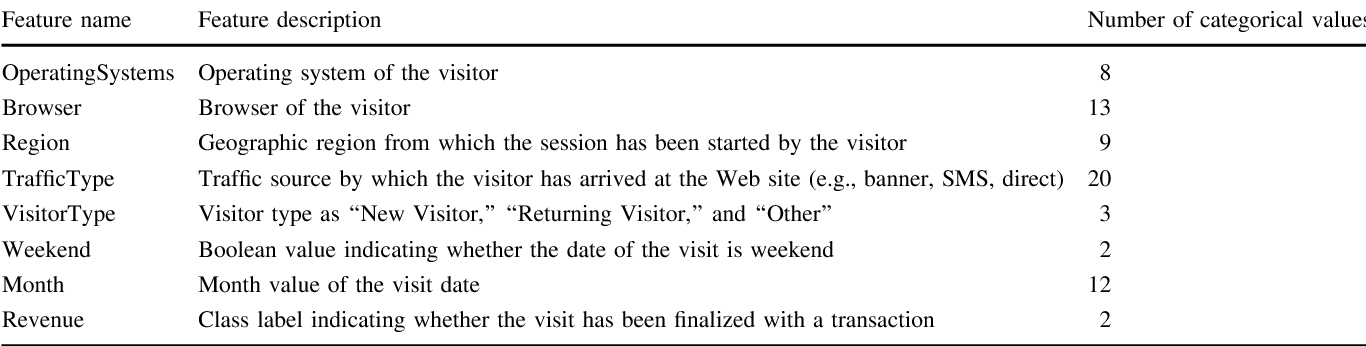

In [14]:

Image(filename='categoricalfeatures.png')

### univarient analysis

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

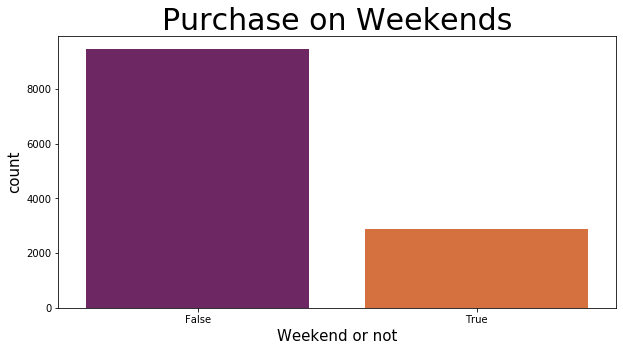

In [16]:
# checking the Distribution of customers on Weekend
plt.figure(figsize=(10,5))
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

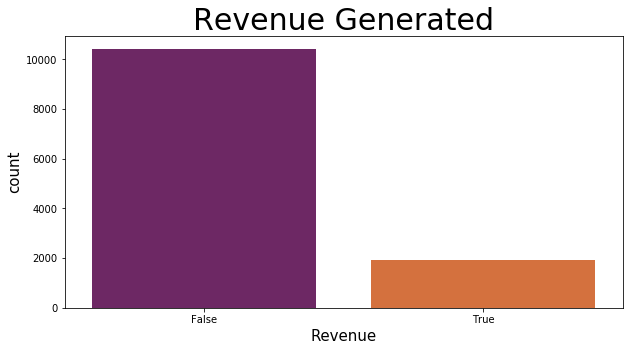

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data['Revenue'], palette = 'inferno')
plt.title('Revenue Generated', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

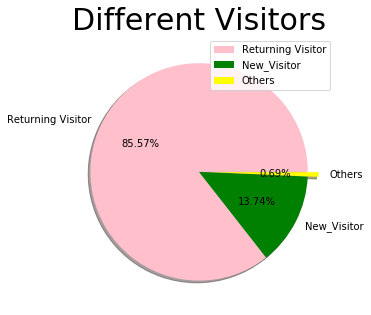

In [18]:
# plotting a pie chart for browsers

plt.figure(figsize=(10,5))
size = [10551, 1694, 85]
colors = ['pink', 'green', 'yellow']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

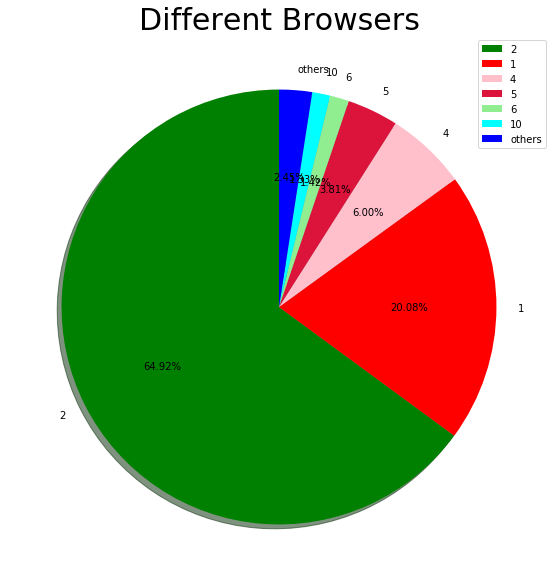

In [19]:
# plotting a pie chart for browsers

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['green', 'red', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.figure(figsize=(30,10))
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [20]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

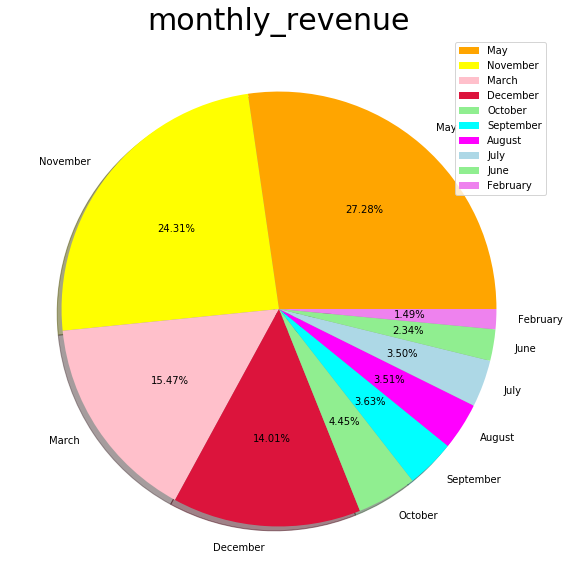

In [21]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(figsize=(10,10))
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('monthly_revenue', fontsize = 30)
p = plt.gcf()
plt.axis('off')
plt.legend()

plt.show()


In [22]:
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

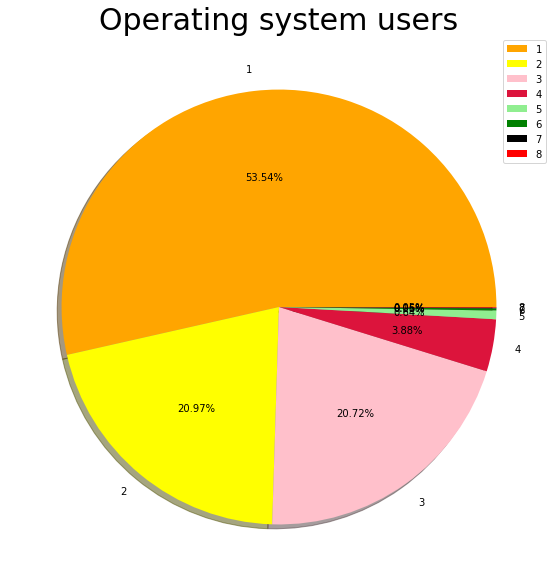

In [23]:
size = [6601, 2585, 2555, 478, 79,19,7,6]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen','green','black','red']
labels = "1", "2","3","4","5","6","7","8"
explode = [0, 0, 0, 0, 0,0,0,0]

plt.figure(figsize=(10,10))
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Operating system users', fontsize = 30)
plt.axis('off')
plt.legend()

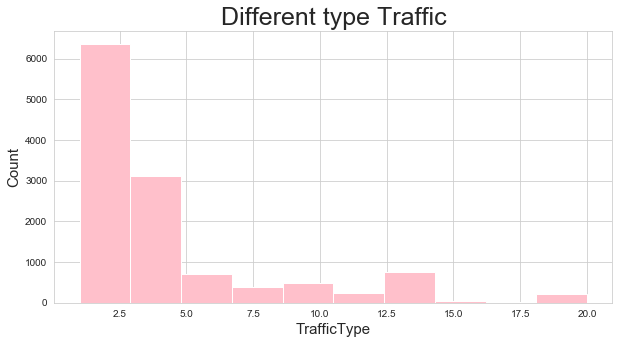

In [24]:

# visualizing the distribution of customers around the Region
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.hist(data['TrafficType'],color='pink')
plt.title('Different type Traffic',fontsize = 25)
plt.xlabel('TrafficType', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

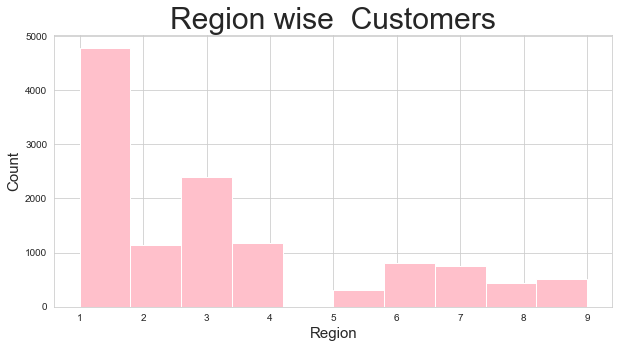

In [25]:
# visualizing the distribution of customers around the Region
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.hist(data['Region'], color = 'pink')
plt.title('Region wise  Customers',fontsize = 30)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


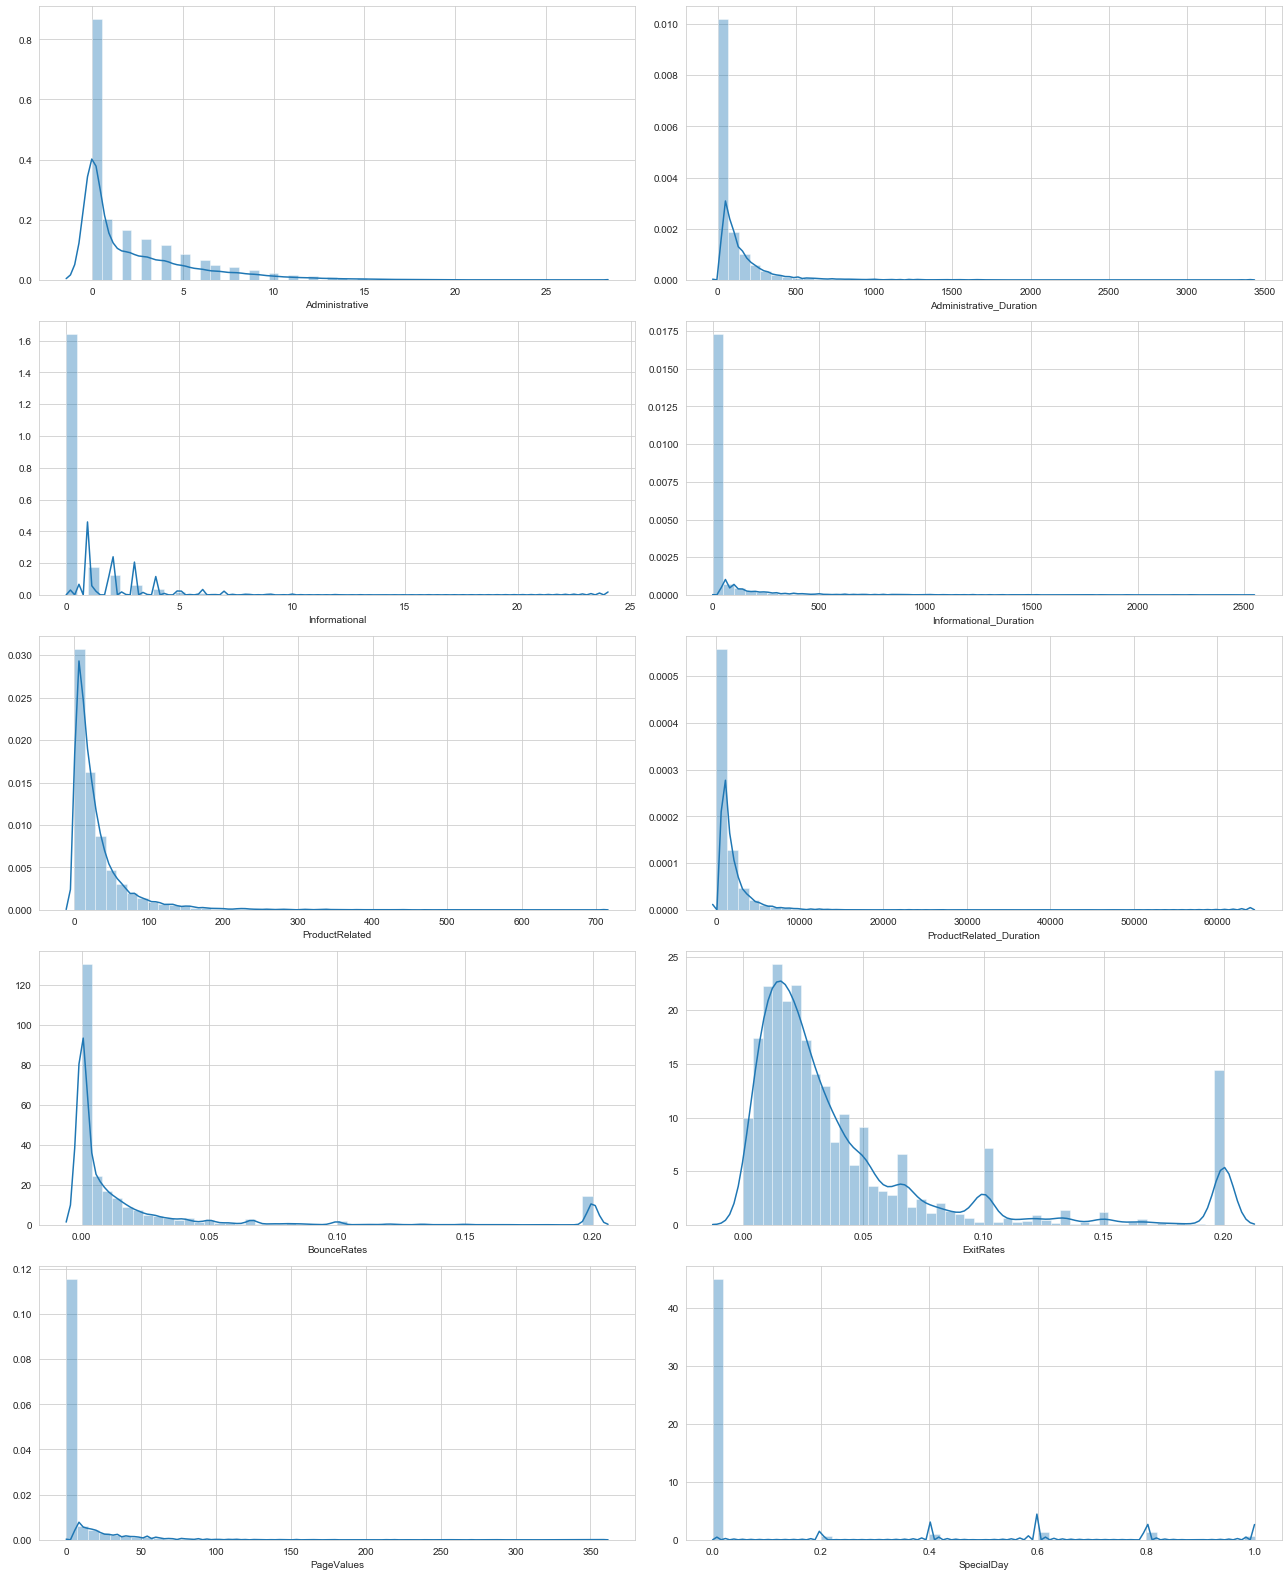

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = data_num_cols.columns
fig, ax = plt.subplots(5,2,figsize=(18,22))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(data_num_cols[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

### `Bivarient_analysis

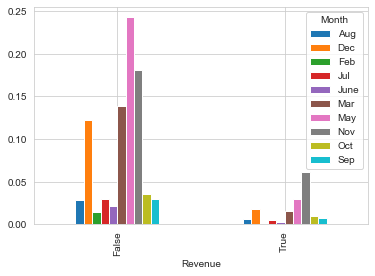

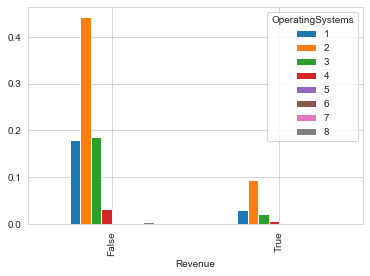

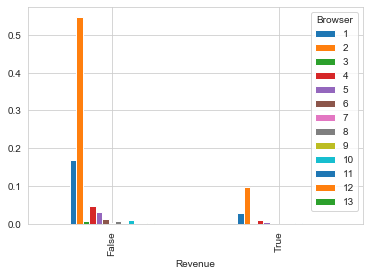

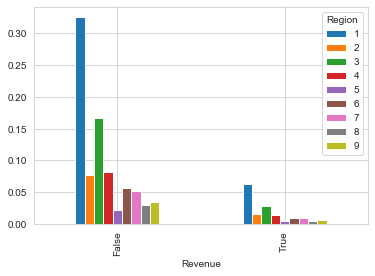

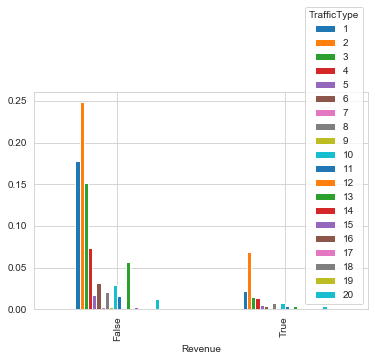

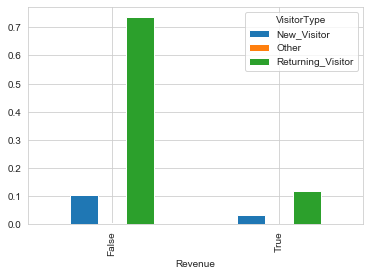

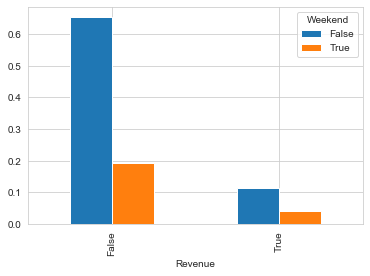

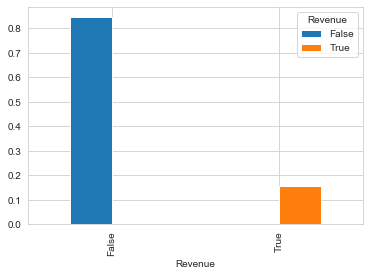

In [27]:
for i, col in enumerate(data_cat_cols):
    pd.crosstab(data['Revenue'], data[col], normalize=True).plot.bar()
    
plt.show()

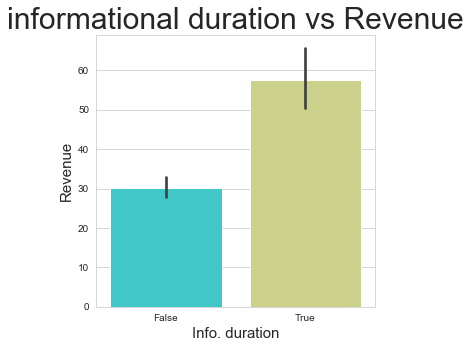

In [28]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (5, 5)


sns.barplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('informational duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

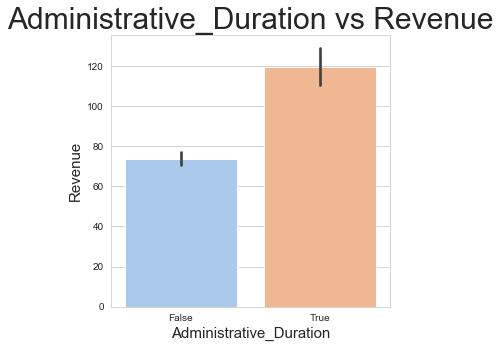

In [29]:

sns.barplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Administrative_Duration vs Revenue', fontsize = 30)
plt.xlabel('Administrative_Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

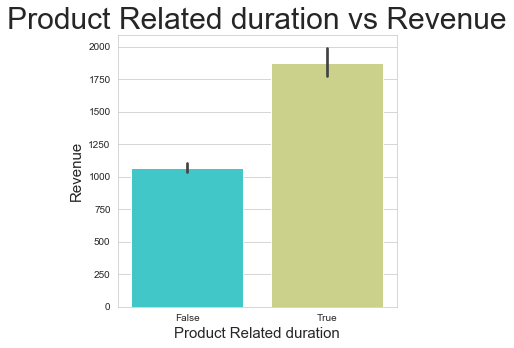

In [30]:
sns.barplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'rainbow')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

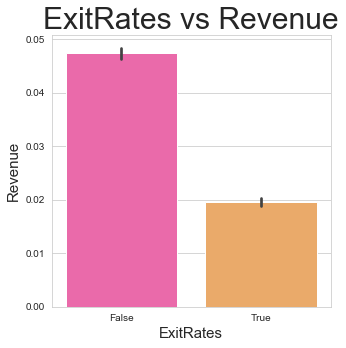

In [31]:

sns.barplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

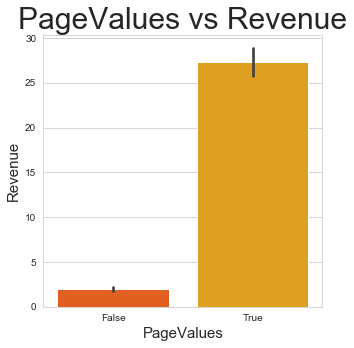

In [32]:
plt.rcParams['figure.figsize'] = (5,5)
sns.barplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

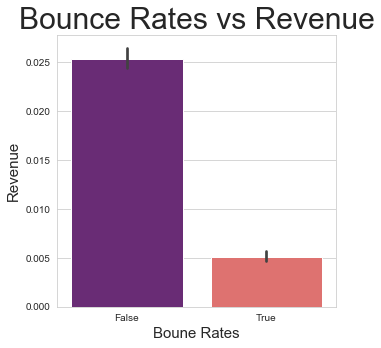

In [33]:

sns.barplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

### model building 

In [36]:
df = pd.get_dummies(data,columns=['SpecialDay', 'Month', 'OperatingSystems',
                                'Browser','Region','TrafficType','VisitorType','Weekend'])

In [37]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,False,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,False,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,False,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,False,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,False,...,0,0,0,0,0,0,0,1,0,1


In [38]:
df['Revenue'].replace({False:0,True:1},inplace=True)

In [39]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,...,0,0,0,0,0,0,0,1,0,1


In [40]:
x= df.drop(columns=['Revenue'])
y= df['Revenue']

In [42]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [44]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    print(sklearn.metrics.cohen_kappa_score(y_test, y_test_pred))

In [46]:
def evaluate_model(model, X, y):
    from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
    
    ypred = model.predict(X)
    cm = confusion_matrix(y, ypred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
        
    print(classification_report(y, ypred))
    print()

AUC score of Train: 0.9027355838685623
[[7114  184]
 [ 821  512]]


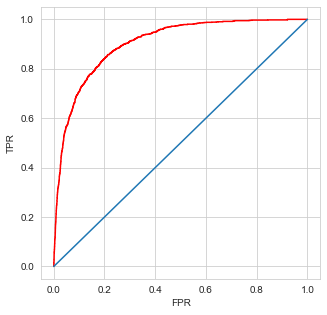

1032
AUC score of Test: 0.8952090408061014
[[3054   70]
 [ 372  203]]


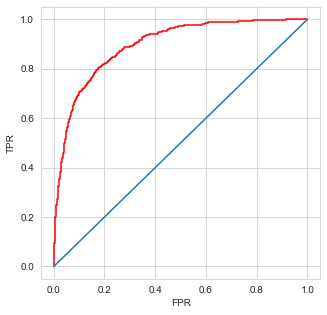

394
0.420803159413944


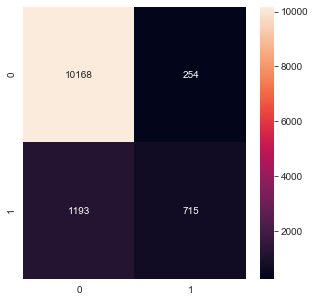

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     10422
           1       0.74      0.37      0.50      1908

    accuracy                           0.88     12330
   macro avg       0.82      0.68      0.72     12330
weighted avg       0.87      0.88      0.87     12330




In [51]:
model_fit(lr, X_train, y_train, X_test,y_test)
evaluate_model(lr, x,y)

In [54]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold, cross_val_score
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
cv_results = model_selection.cross_val_score(lr,x,y,cv = kfold,scoring = 'roc_auc')
print(cv_results.mean())

0.897646841931995
